In [8]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [9]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [10]:
from sodapy import Socrata

In [11]:
data_url='data.nashville.gov'

In [12]:
data_set='fuaa-r5cm'

In [13]:
import json

In [15]:
with open('keys.json') as fi:
    credentials = json.load(fi)

In [16]:
app_token = credentials['app_token']

In [18]:
#app_token

In [19]:
client = Socrata(data_url, app_token)

In [20]:
client.timeout = 60

In [21]:
results = client.get(data_set, limit=2000)

In [22]:
results_df = pd.DataFrame.from_records(results)
results_df.head()

,month_name,year,query_count,query_text
0,January,2014,223,ebid
1,January,2014,112,property maps
2,January,2014,97,maps
3,January,2014,90,property tax
4,January,2014,76,jobs


In [23]:
#get metadata
metadata = client.get_metadata(data_set)
#[x['name'] for x in metadata['columns']]
metadata

{'id': 'fuaa-r5cm',
 'name': 'Nashville.gov - Top 500 Monthly Searches',
 'assetType': 'dataset',
 'attribution': 'NetTango and Metro Information Technology Services',
 'attributionLink': 'http://www.nashville.gov/Search.aspx',
 'averageRating': 0,
 'category': 'Public Services',
 'createdAt': 1398968952,
 'description': "A listing of the top 500 queries performed on Nashville.gov using the site's search feature, sorted by month and year.",
 'displayType': 'table',
 'downloadCount': 1139,
 'hideFromCatalog': False,
 'hideFromDataJson': False,
 'indexUpdatedAt': 1555682566,
 'licenseId': 'PUBLIC_DOMAIN',
 'newBackend': True,
 'numberOfComments': 0,
 'oid': 31299163,
 'provenance': 'official',
 'publicationAppendEnabled': False,
 'publicationDate': 1555682571,
 'publicationGroup': 1566053,
 'publicationStage': 'published',
 'rowsUpdatedAt': 1628868679,
 'rowsUpdatedBy': 'n59w-v7ka',
 'tableId': 16119291,
 'totalTimesRated': 0,
 'viewCount': 8633,
 'viewLastModified': 1628868678,
 'viewTy

In [24]:
print(results[0])

{'month_name': 'January', 'year': '2014', 'query_count': '223', 'query_text': 'ebid'}


In [25]:
record_count = client.get(data_set, select="COUNT(*)")
record_count

[{'COUNT': '43677'}]

##  1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches

In [26]:
results_fire = client.get(data_set, where="query_text = 'fire' AND year=2016", select="month_name, year, sum(query_count)", group="month_name, year", order="year", limit=50000)

In [27]:
results_fire

[{'month_name': 'April', 'year': '2016', 'sum_query_count': '26'},
 {'month_name': 'August', 'year': '2016', 'sum_query_count': '47'},
 {'month_name': 'December', 'year': '2016', 'sum_query_count': '38'},
 {'month_name': 'February', 'year': '2016', 'sum_query_count': '35'},
 {'month_name': 'January', 'year': '2016', 'sum_query_count': '19'},
 {'month_name': 'July', 'year': '2016', 'sum_query_count': '24'},
 {'month_name': 'June', 'year': '2016', 'sum_query_count': '31'},
 {'month_name': 'March', 'year': '2016', 'sum_query_count': '32'},
 {'month_name': 'May', 'year': '2016', 'sum_query_count': '24'},
 {'month_name': 'November', 'year': '2016', 'sum_query_count': '32'},
 {'month_name': 'October', 'year': '2016', 'sum_query_count': '38'},
 {'month_name': 'September', 'year': '2016', 'sum_query_count': '36'}]

## 2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [28]:
results_count_100 = client.get(data_set, where="query_count > 100", select="COUNT(month_name)",  limit=50000)

In [29]:
results_count_100

[{'COUNT_month_name': '1262'}]

## 3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [30]:
results_count_codes_100 = client.get(data_set, where="query_text = 'codes' AND query_count > 100", select="COUNT(month_name)",  limit=50000)

In [31]:
results_count_codes_100

[{'COUNT_month_name': '56'}]

## 4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [32]:
results_count_maps = client.get(data_set, where="query_text = 'maps'", select="month_name, year, sum(query_count)", group="month_name, year", order="year", limit=50000)

In [34]:
results_count_maps

[{'month_name': 'April', 'year': '2014', 'sum_query_count': '152'},
 {'month_name': 'August', 'year': '2014', 'sum_query_count': '118'},
 {'month_name': 'December', 'year': '2014', 'sum_query_count': '97'},
 {'month_name': 'February', 'year': '2014', 'sum_query_count': '140'},
 {'month_name': 'January', 'year': '2014', 'sum_query_count': '97'},
 {'month_name': 'July', 'year': '2014', 'sum_query_count': '121'},
 {'month_name': 'June', 'year': '2014', 'sum_query_count': '121'},
 {'month_name': 'March', 'year': '2014', 'sum_query_count': '144'},
 {'month_name': 'May', 'year': '2014', 'sum_query_count': '119'},
 {'month_name': 'November', 'year': '2014', 'sum_query_count': '82'},
 {'month_name': 'October', 'year': '2014', 'sum_query_count': '100'},
 {'month_name': 'September', 'year': '2014', 'sum_query_count': '115'},
 {'month_name': 'April', 'year': '2015', 'sum_query_count': '130'},
 {'month_name': 'August', 'year': '2015', 'sum_query_count': '81'},
 {'month_name': 'December', 'year': '

In [36]:
maps_df = pd.DataFrame.from_records(results_count_maps)
maps_df

,month_name,year,sum_query_count
0,April,2014,152
1,August,2014,118
2,December,2014,97
3,February,2014,140
4,January,2014,97
...,...,...,...
77,November,2020,86
78,October,2020,127
79,April,2021,148
80,June,2021,151


In [37]:
maps_df['month_year'] = maps_df['month_name'] + str(' ') + maps_df['year']
maps_df

,month_name,year,sum_query_count,month_year
0,April,2014,152,April 2014
1,August,2014,118,August 2014
2,December,2014,97,December 2014
3,February,2014,140,February 2014
4,January,2014,97,January 2014
...,...,...,...,...
77,November,2020,86,November 2020
78,October,2020,127,October 2020
79,April,2021,148,April 2021
80,June,2021,151,June 2021


In [38]:
maps_df.dtypes

month_name         object
year               object
sum_query_count    object
month_year         object
dtype: object

In [39]:
maps_df = maps_df.astype({'sum_query_count':'int'})

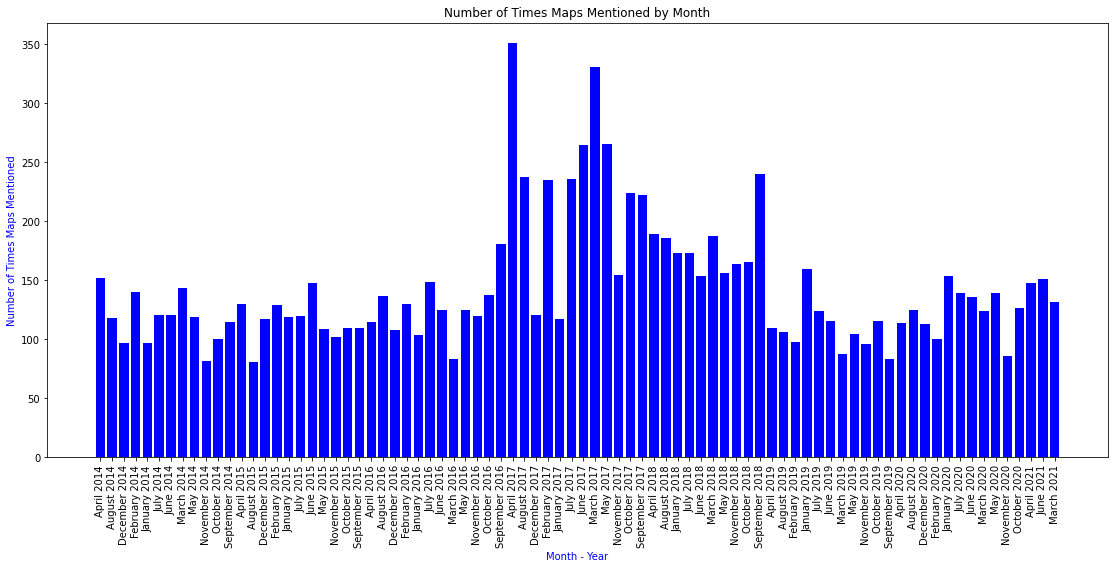

In [40]:
#plot monthly mention of maps
plt.rcParams["figure.figsize"] = (19,8)
plt.bar(maps_df['month_year'], maps_df['sum_query_count'], color='blue')
plt.xlabel('Month - Year', color='blue')
plt.title('Number of Times Maps Mentioned by Month',color='black')
plt.tick_params(axis='x', rotation = 90, colors='black')
plt.tick_params(axis='y', colors='black')
plt.ylabel('Number of Times Maps Mentioned',color='blue')
#plt.savefig('maps-mentioned-by-month.png', transparent=False)
plt.show()

## 5. Make an API request to pull back all the data from hubNashville (311) Service Requests (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one)

In [41]:
# api: https://data.nashville.gov/resource/7qhx-rexh.json


In [42]:
data_url_311 ='data.nashville.gov'

In [43]:
data_set_311='7qhx-rexh'

In [44]:
client_311 = Socrata(data_url_311, app_token)

In [45]:
client_311.timeout = 60

In [46]:
results_311 = client_311.get(data_set_311, limit=2000)

In [47]:
print(results_311[0])

{'case_number': '890432', 'status': 'Closed', 'case_request': 'Trash, Recycling & Litter', 'case_subrequest': 'Missed Pickup - Trash Cart Service', 'additional_subrequest': 'Trash - Curbside/Alley Missed Pickup', 'date_time_opened': '2022-02-08T22:26:54.000', 'date_time_closed': '2022-02-09T21:36:17.000', 'case_origin': 'hubNashville Community', 'state_issue': 'False', 'closed_when_created': 'False', 'incident_address': '1609 Saunders Ave', 'incident_city': 'MADISON', 'incident_council_district': '8', 'incident_zip_code': '37115', 'latitude': '36.24031066163978', 'longitude': '-86.73143289325408', 'mapped_location': {'latitude': '36.24031066163978', 'longitude': '-86.73143289325408'}, ':@computed_region_wvby_4s8j': '1', ':@computed_region_3aw5_2wv7': '1', ':@computed_region_p6sk_2acq': '3', ':@computed_region_gxvr_9jxz': '12', ':@computed_region_yf9r_ed6g': '3', ':@computed_region_fvtq_wnma': '26', ':@computed_region_s8bq_67w7': '3', ':@computed_region_v67z_xm3t': '2', ':@computed_regi

In [48]:
results_311_df = pd.DataFrame.from_records(results_311)
results_311_df.head()

,case_number,status,case_request,case_subrequest,additional_subrequest,date_time_opened,date_time_closed,case_origin,state_issue,closed_when_created,...,:@computed_region_s8bq_67w7,:@computed_region_v67z_xm3t,:@computed_region_kh5x_g7w5,:@computed_region_cfa7_hbpz,:@computed_region_sjpq_96s8,:@computed_region_gisn_y5cm,:@computed_region_b9k3_hpc2,parent_case,oem_id,contact_type
0,890432,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,2022-02-08T22:26:54.000,2022-02-09T21:36:17.000,hubNashville Community,False,False,...,3,2,3,744,1527,4,2,NaN,NaN,NaN
1,889750,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Report a Damaged Cart,2022-02-08T15:24:31.000,2022-02-09T21:36:09.000,hubNashville Community,False,False,...,23,1,14,642,15798,8,1,NaN,NaN,NaN
2,889990,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,2022-02-08T17:54:14.000,2022-02-09T21:32:43.000,Phone,False,False,...,11,7,7,14,15548,2,7,NaN,NaN,NaN
3,887729,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,2022-02-04T23:29:13.000,2022-02-28T21:46:54.000,hubNashville Community,False,False,...,30,8,30,667,24062,7,8,NaN,NaN,NaN
4,890361,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Backdoor,2022-02-08T21:45:29.000,2022-02-28T21:49:05.000,Phone,False,False,...,19,4,20,122,15807,3,4,NaN,NaN,NaN


In [49]:
#get metadata for 311
metadata_311 = client.get_metadata(data_set_311)
[x['name'] for x in metadata_311['columns']]
#metadata

['Request #',
 'Status',
 'Request Type',
 'Subrequest Type',
 'Additional Subrequest Type',
 'Date / Time Opened',
 'Date / Time Closed',
 'Request Origin',
 'System of Origin ID',
 'Contact Type',
 'Preferred Language',
 'State Issue',
 'Parent Request',
 'Closed When Created',
 'Address',
 'City',
 'Council District',
 'ZIP',
 'Latitude',
 'Longitude',
 'Mapped Location',
 'Davidson County Border (GIS)',
 'Service Districts (GIS)',
 'Council District Outlines (GIS)',
 'Zip Codes (GIS)',
 'Council Districts_from_c9xn_skx3',
 'Zip Codes_data_from_wv8u_vs37',
 'Council Districts',
 'School Districts',
 'Council Districts_uniq_prepend',
 'Neighborhoods',
 'Zip Codes',
 'Police Precincts',
 'Davidson County School District Outlines (GIS)']

In [50]:
record_count_311 = client_311.get(data_set_311, select="COUNT(*)")
record_count_311

[{'COUNT': '936864'}]

In [51]:
results_311_rows = client_311.get(data_set_311, select="*", limit=936864)

In [52]:
results_311_rows_df = pd.DataFrame.from_records(results_311_rows)

In [53]:
results_311_rows_df.count()

case_number                    936864
status                         936864
case_request                   936444
case_subrequest                932253
additional_subrequest          904041
date_time_opened               936864
date_time_closed               919213
case_origin                    936864
state_issue                    936864
closed_when_created            936864
incident_address               637408
incident_city                  627370
incident_council_district      626700
incident_zip_code              626469
latitude                       636890
longitude                      636890
mapped_location                636890
:@computed_region_wvby_4s8j    633241
:@computed_region_3aw5_2wv7    633239
:@computed_region_p6sk_2acq    633241
:@computed_region_gxvr_9jxz    633284
:@computed_region_yf9r_ed6g    633241
:@computed_region_fvtq_wnma    633286
:@computed_region_s8bq_67w7    633241
:@computed_region_v67z_xm3t    633241
:@computed_region_kh5x_g7w5    633241
:@computed_r

## 6. Find 2 new data sets on data.nashville.gov, make API requests to pull the data, and do an analysis that combines the data sets.

In [54]:
#https://data.nashville.gov/resource/4ibi-mxs4.json

In [55]:
data_url_emp ='data.nashville.gov'

In [56]:
data_set_emp ='4ibi-mxs4'

## not applicable to this project ## Basic API Usage

Let's start by using the Numbers API, an API which provides interesting facts about numbers.

With any API, you should start by inspecting the documentation. For the Numbers API, the documentation is located here: http://numbersapi.com

We will be using the `requests` package to make a `GET` request to an API. Similar to webscraping, APIs require an endpoint to tell python where to send the request.

When using an API, the first thing we need to know is the expected URL structure. In this case, it is http://numbersapi.com/number/type where number is the number for which we want an interesting fact and type indicates which type of fact we want. Note that type can be omitted, and it will default to trivia.

In [ ]:
#number_range = "1..10"

#endpoint = f'http://numbersapi.com/{number_range}'

#response = requests.get(endpoint)

We can look at the response as text.

In [ ]:
response.text

However, it will be easier to work with as a json. We can use the `json` method to convert the results to a dictionary.

In [ ]:
response_json = response.json()
response_json

Then, we can access the individual entries by passing in the correct key.